In [2]:
setwd('/import/DB/fel/BJTC-204')

In [3]:
data = read.csv('./TOD.rela.2.csv',row.names = 1)

In [4]:
load('./exp4.rda')

In [5]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [6]:
dim(exp4)

[1]   251 11882

In [7]:
dim(data)

[1]    84 11886

In [8]:
expr = exp4[data$GSM,8:11882]

colnames(expr) = gsub('-','.',colnames(expr))
expr <- expr[, !grepl("^\\d+", names(expr))]

In [9]:
expr1 = expr%>%  t() %>%  as.data.frame()

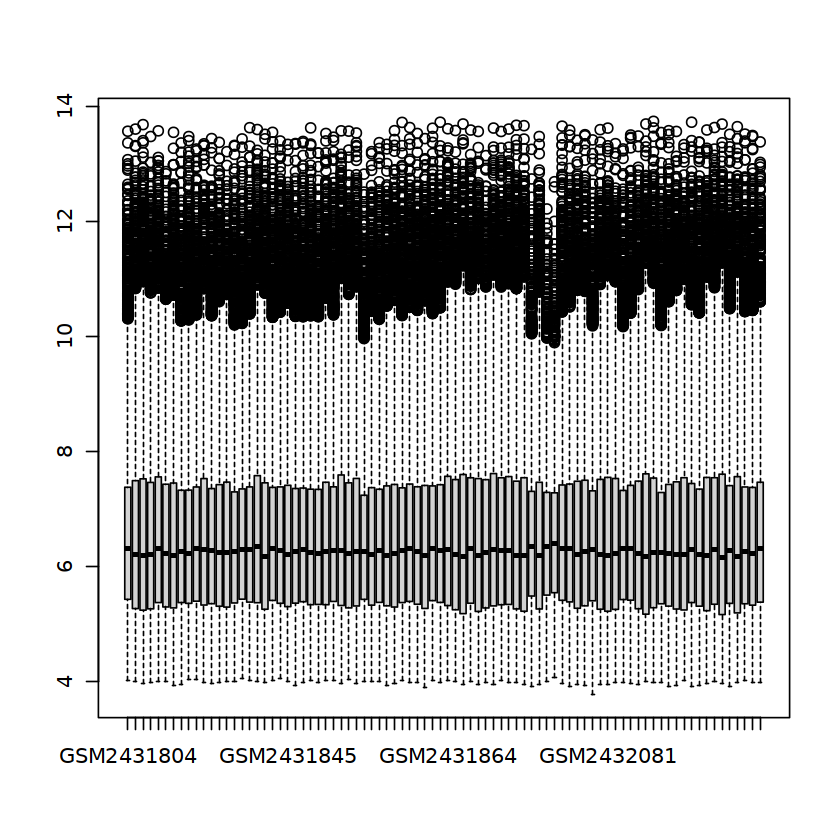

In [10]:
boxplot(expr1)

In [11]:
TYPE = data$TYPE

In [12]:
library(limma)
library(dplyr)
f <- TYPE %>% as.factor()

Warning message:
"package 'limma' was built under R version 4.2.3"


In [13]:
TYPE

[1] "Control" "Control" "Control" "Control" "Control" "Control" "Control"
 [8] "Control" "Control" "Control" "Control" "Control" "Control" "Control"
[15] "Control" "Control" "Control" "Control" "Control" "Control" "Control"
[22] "Control" "Control" "Control" "Control" "Control" "Control" "Control"
[29] "Control" "Control" "Control" "Control" "Control" "Control" "Control"
[36] "Control" "Control" "Control" "Control" "Control" "Control" "Control"
[43] "Control" "Control" "Control" "Control" "Control" "Control" "Control"
[50] "Control" "Control" "MDD"     "MDD"     "MDD"     "MDD"     "MDD"    
[57] "MDD"     "MDD"     "MDD"     "MDD"     "MDD"     "MDD"     "MDD"    
[64] "MDD"     "MDD"     "MDD"     "MDD"     "MDD"     "MDD"     "MDD"    
[71] "MDD"     "MDD"     "MDD"     "MDD"     "MDD"     "MDD"     "MDD"    
[78] "MDD"     "MDD"     "MDD"     "MDD"     "MDD"     "MDD"     "MDD"

In [14]:

desigN <- model.matrix(~ 0 + f)
colnames(desigN) <- levels(f)
fit = lmFit(expr1, desigN)
contrast.matrix <- makeContrasts(MDD - Control, levels = colnames(coef(fit)))
contrast.matrix 

,MDD - Control
Control,-1
MDD,1


In [15]:
fit2 <- contrasts.fit(fit, contrast.matrix) 
fit2 <- eBayes(fit2) 
tempOutput <- topTable(fit2,coef=1,n=Inf,adjust="BH")
head(tempOutput)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
VPS4A,0.2623860,8.435965,3.694976,0.0003882526,0.6551266,-0.3465502
PAF1,0.2320465,6.206406,3.583609,0.0005641751,0.6551266,-0.6225115
BAIAP3,0.2388918,7.846285,3.560149,0.0006098303,0.6551266,-0.6799161
RHBDF1,-0.2047613,6.683161,-3.536307,0.0006598003,0.6551266,-0.7379919
SFXN3,0.2242499,7.832377,3.497382,0.0007497940,0.6551266,-0.8322274
HBBP1,-0.2396864,5.462987,-3.487191,0.0007752057,0.6551266,-0.8567813


In [26]:
diff <- 
  tempOutput %>% 
  mutate(change = as.factor(ifelse(P.Value < 0.05 & abs(logFC) > 0,
                                   ifelse(logFC > 0 ,'Up','Down'),'NOT'))) 
diff$gene = rownames(diff)

In [27]:
library(ggplot2)
library(ggpubr)
library(ggrepel)
library(cowplot)

Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Warning message:
"package 'ggpubr' was built under R version 4.2.3"
Warning message:
"package 'ggrepel' was built under R version 4.2.3"
Warning message:
"package 'cowplot' was built under R version 4.2.3"

Attaching package: 'cowplot'


The following object is masked from 'package:ggpubr':

    get_legend




In [28]:
diff[c('MUS81','UCK2','CNIH3','OTUD4'),]

,logFC,AveExpr,t,P.Value,adj.P.Val,B,change,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
MUS81,0.13026015,7.245138,3.030861,0.003231176,0.6551266,-1.902822,Up,MUS81
UCK2,0.11253785,5.998448,2.440623,0.016738268,0.6904927,-3.085006,Up,UCK2
CNIH3,0.20514162,5.410467,2.586411,0.011400479,0.6904927,-2.812314,Up,CNIH3
OTUD4,0.06436292,5.031832,2.241400,0.027605777,0.7324586,-3.435939,Up,OTUD4


In [31]:
top_5 <- bind_rows(   
      diff %>%
        filter(gene  %in% c('CNIH3','OTUD4','MUS81','UCK2')) %>%
        arrange(P.Value, desc(logFC)) %>%
        head(4),
      diff %>%
        filter(gene  %in% c()) %>%
        arrange(P.Value, desc(logFC)) %>%
        head(0)
    )

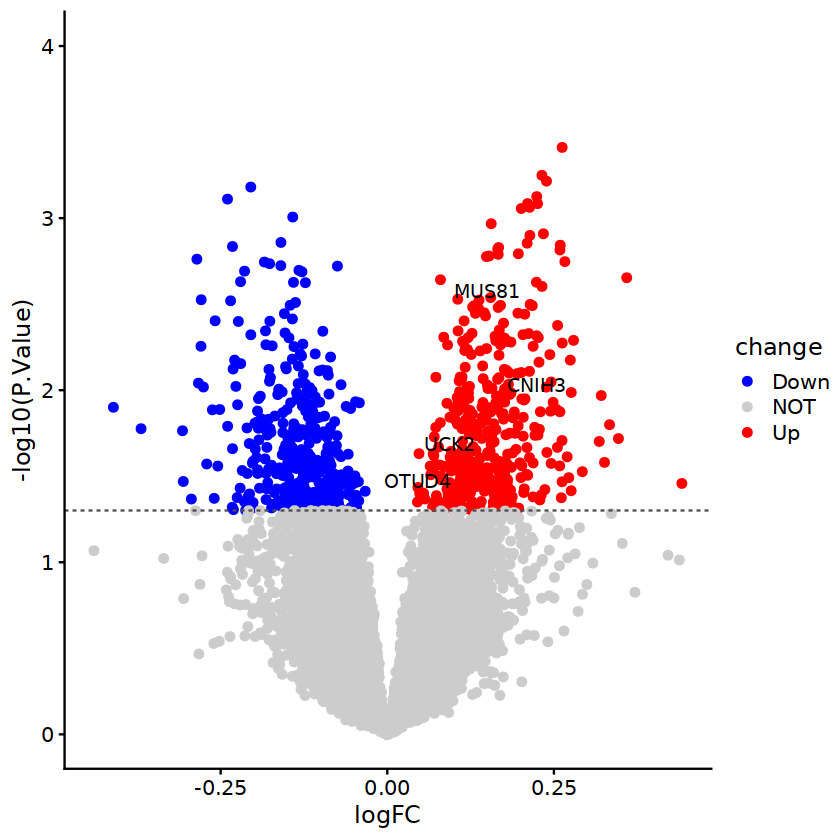

In [32]:
    ggplot(data=diff,aes(x=logFC,y=-log10(P.Value)))+
    geom_point(aes(color=change),size=2)+
    geom_hline(yintercept = -log10(0.05), linetype="dashed",color="grey30")+
    #geom_vline(xintercept = c(-0.3,0.3),linetype="dashed",color="grey30")+
    geom_text_repel(data=top_5,aes(x= logFC,y= -log10(P.Value),label= rownames(top_5)))+
    scale_color_manual(values = c("blue","grey80","red"))+
    theme_half_open() +ylim(0,4)#+xlim(-1.5,1.5)

In [16]:
gene2 = tempOutput %>% filter(P.Value < 0.05) %>%  rownames()

In [17]:
length(gene2)

[1] 781

In [18]:
load('./zhisha.gene.rda')

In [19]:
gene3 = intersect(gene1,gene2)

In [25]:
save(gene3,file  = 'zhisha.mdd.control.overlap.rda')

In [21]:
tempOutput1 = tempOutput %>%  dplyr::filter(P.Value < 0.05)

write.csv(tempOutput1,file = 'diffgene2.csv')

In [25]:
tempOutput1['CNIH3',]

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CNIH3,0.2051416,5.410467,2.586411,0.01140048,0.6904927,-2.812314


In [28]:
getwd()

[1] "/import/DB/fel/BJTC-204"

In [36]:
data2 = cbind(TYPE,expr)

In [38]:
write.csv(data2,file = 'MDD.Con.csv')

In [37]:
data2

,TYPE,NAT2,ADA,CDH2,AKT3,MED6,NR2E3,NAALAD2,NAALADL1,CDKN2BAS,...,HNRPDL,DMTF1,PPP4R1,CDH1,SLC12A6,ROD1,KCNE2,DGCR2,CASP8AP2,SCO2
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GSM2431804,Control,6.831036,6.173794,7.760346,5.150809,5.543302,5.361173,4.566961,5.131811,7.045799,...,8.542607,8.301062,6.896081,4.490684,6.003487,4.956644,7.644263,7.408029,5.906133,5.876785
GSM2432040,Control,6.172921,5.700313,7.810127,5.198258,5.641538,5.011819,4.694443,4.855272,5.926896,...,8.878981,8.587653,6.628235,4.374113,5.297534,4.864552,7.318215,7.543359,5.863712,5.981731
GSM2432045,Control,5.531121,5.489066,7.944343,4.902137,5.634438,5.043738,4.501929,5.062176,5.835277,...,9.035219,8.298866,6.491999,4.338877,5.348225,4.773315,7.394998,7.475051,5.696833,6.269534
GSM2431943,Control,6.215344,5.757790,7.731380,4.789191,5.834129,4.835526,4.763525,5.018755,5.915698,...,8.940692,8.309396,6.601897,4.338805,5.699097,4.892797,7.329340,7.049498,6.436767,5.999408
GSM2431991,Control,5.974403,5.792424,8.211436,5.012664,5.861378,4.966552,4.770954,5.236994,5.752494,...,8.868911,8.130179,7.155901,4.498653,5.931903,4.813763,7.353592,7.835502,6.195664,5.994307
GSM2432005,Control,6.437722,5.691925,7.581928,5.329002,5.611962,5.117423,4.474395,5.167308,5.967606,...,8.448607,8.315181,6.587846,4.477241,5.636621,4.826267,7.619539,7.087357,6.017619,6.082608
GSM2432041,Control,6.391108,5.803335,7.528414,5.143940,5.987216,4.866023,4.457829,5.404153,6.063781,...,9.089148,8.358779,6.843477,4.371798,5.623941,4.739303,7.446600,7.325371,5.732588,6.273458
GSM2431769,Control,6.318993,5.804358,7.757755,5.201409,5.295739,5.138739,4.502685,5.314121,6.049458,...,8.161522,8.195876,6.836361,4.357489,5.692772,4.841145,7.475384,7.812882,5.551476,6.018019
GSM2431857,Control,6.508093,5.916554,7.792536,4.955380,5.175919,5.083509,4.368849,5.077227,6.643630,...,8.693494,8.104687,6.915171,4.384948,5.738693,4.981701,7.395989,7.002056,5.516187,6.106625
